# Visualize observability

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.time import Time
from IPython.display import display
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from db import TelescopeManager
from surveyplanner import SurveyPlanner
from visualizations import ObservabilityVisualizer, AnnualObservabilityVisualizer

## Setup

We load two databases: 

1. The `test_planner.sqlite3` database contains the observability for the full year 2024 with all Pasiphae constraints applied.
1. The `test_planner_min_constr.sqlite3` database contains the observability for the full year 2024 with just two constraints applied. The constraints are an elevation limit and an hour angle limit. The same constraints are applied to both telescopes.

We show both in comparison, which will indicate the effects that the Pasiphae specific constraints have on the observability.

Set up surveyplanners:

In [3]:
db_names = {
        'pasiphae_constr': 'test_planner.sqlite3',
        'min_constr': 'test_planner_min_constr.sqlite3'}
labels = {
        'pasiphae_constr': 'Pasiphae constraints',
        'min_constr': 'Minimum constraints'}
keys = db_names.keys()
planner = {key: SurveyPlanner(db_name) for key, db_name in db_names.items()}

Set up visualizers:

In [4]:
visualizer = {key: ObservabilityVisualizer(surveyplanner=planner[key]) for key in db_names.keys()}

Define plotting function:

In [5]:
def plot(dates, obs, galactic, projection, save_dir, save_prefix):
    """Plot the observabilty in a sequence of plots for different dates."""
    
    fig = plt.figure(figsize=(16, 5))
    gs = GridSpec(1, 5, width_ratios=[20, 1, 2, 20, 1])
    ax = [plt.subplot(gs[0], projection=projection),
          plt.subplot(gs[3], projection=projection)]
    cax = [plt.subplot(gs[1]),
          plt.subplot(gs[4])]

    # iterate through dates:
    for date in dates:
        print(f'Plot date {date.iso[:10]}..')

        # clear figure:
        for a in ax:
            a.cla()

        # plot:
        for i, key in enumerate(keys):
            visualizer[key].plot(obs, night=date, galactic=galactic, ax=ax[i], cax=cax[i], plot_kws={'s': 6})
            ax[i].set_title(labels[key], y=1.1)

        # add figure title and save:
        fig.suptitle(f'{titles[obs]}\n{date.iso[:10]}')
        plt.savefig(os.path.join(save_dir, f'{save_prefix}_{date.iso[:10]}.png'))

Save directory for plots:

In [6]:
root_figs = 'plots/observability/'

Figure titles:

In [7]:
titles = {
        'status': 'Observability status',
        'start': 'Observability window start UTC',
        'stop': 'Observability window stop UTC',
        'duration': 'Observability window duration',
        'setting_duration': 'Field setting duration'}

## What are the observational constraints?

In [8]:
for key in keys:
    print(f'Database: {db_names[key]}\n')
    manager = TelescopeManager(db_names[key])
    manager.info(constraints=True)
    print()

Database: test_planner.sqlite3

============ TELECOPES ============
2 telescopes stored in database.
-----------------------------------
Telescope ID: 1
Name: Skinakas
Latitude :      35.21 deg N
Longitude:      24.90 deg E
Height:       1750.00 m            
Constraints:
* Twilight
  - twilight: -12.0
* AirmassLimit
  - limit: 2.0
  - conversion: secz
* HourangleLimit
  - limit: 5.33
  - limit_lo: -5.33
* MoonDistance
  - limit: 10.0
-----------------------------------
Telescope ID: 2
Name: SAAO
Latitude :     -32.38 deg N
Longitude:      20.81 deg E
Height:       1798.00 m            
Constraints:
* Twilight
  - twilight: -12.0
* AirmassLimit
  - limit: 2.0
  - conversion: secz
* MoonDistance
  - limit: 10.0
* PolyHADecLimit
  - ha: [-4.0, -4.0, 0.8, 0.8, 1.7, 2.4, 3.2, 2.8]
  - dec: [0.1, -52.0, -65.0, -85.0, -74.5, -70.0, -60.0, 0.1]
-----------------------------------


Database: test_planner_min_constr.sqlite3

============ TELECOPES ============
2 telescopes stored in database.


## Visualizations

In [9]:
galactic = False
projection = 'mollweide'

### Observability status

Plot date 2024-01-01..
Querying fields..
Querying fields..
Plot date 2024-02-01..
Querying fields..
Querying fields..
Plot date 2024-03-01..
Querying fields..
Querying fields..
Plot date 2024-04-01..
Querying fields..
Querying fields..
Plot date 2024-05-01..
Querying fields..
Querying fields..
Plot date 2024-06-01..
Querying fields..
Querying fields..
Plot date 2024-07-01..
Querying fields..
Querying fields..
Plot date 2024-08-01..
Querying fields..
Querying fields..
Plot date 2024-09-01..
Querying fields..
Querying fields..
Plot date 2024-10-01..
Querying fields..
Querying fields..
Plot date 2024-11-01..
Querying fields..
Querying fields..
Plot date 2024-12-01..
Querying fields..
Querying fields..


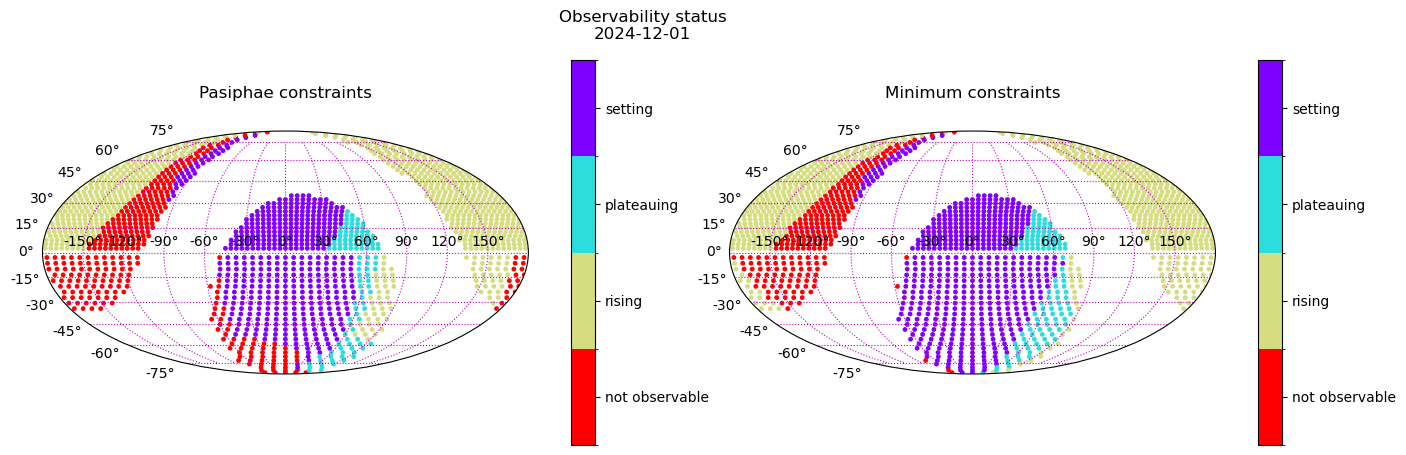

In [10]:
dates = Time([f'2024-{month:02d}-01' for month in range(1, 13)])
save_prefix = '01_ObsStatus'
obs = 'status'

dir_save = os.path.join(root_figs, '{0}_{1}'.format('galactic' if galactic else 'equatorial', projection))

if not os.path.exists(dir_save):
    os.makedirs(dir_save)
    
plot(dates, obs, galactic, projection, dir_save, save_prefix)

### Observability window start time

Plot date 2024-01-01..
Querying fields..
Querying fields..
Plot date 2024-02-01..
Querying fields..
Querying fields..
Plot date 2024-03-01..
Querying fields..
Querying fields..
Plot date 2024-04-01..
Querying fields..
Querying fields..
Plot date 2024-05-01..
Querying fields..
Querying fields..
Plot date 2024-06-01..
Querying fields..
Querying fields..
Plot date 2024-07-01..
Querying fields..
Querying fields..
Plot date 2024-08-01..
Querying fields..
Querying fields..
Plot date 2024-09-01..
Querying fields..
Querying fields..
Plot date 2024-10-01..
Querying fields..
Querying fields..
Plot date 2024-11-01..
Querying fields..
Querying fields..
Plot date 2024-12-01..
Querying fields..
Querying fields..


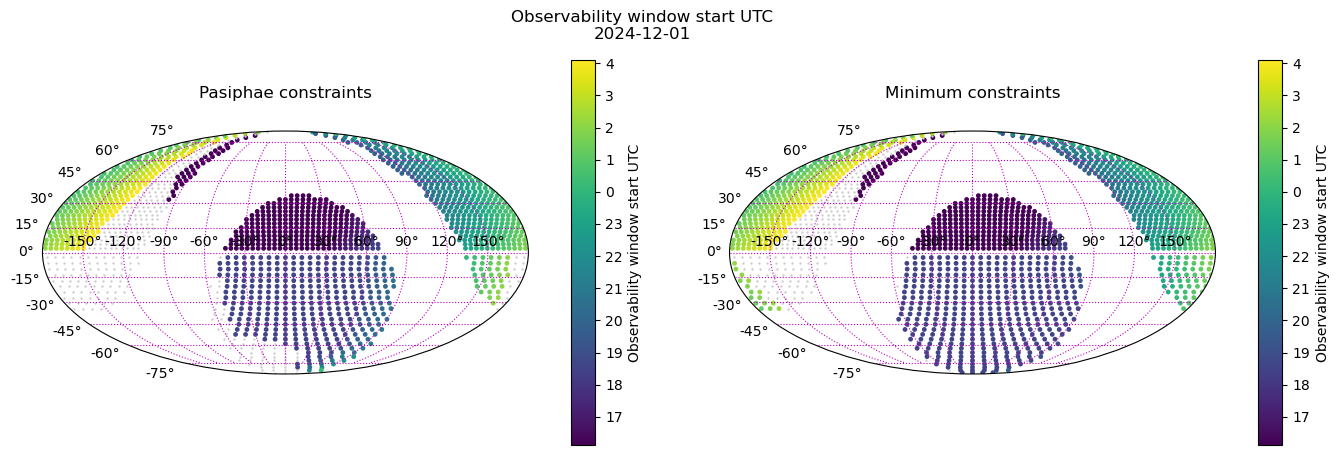

In [11]:
dates = Time([f'2024-{month:02d}-01' for month in range(1, 13)])
save_prefix = '02_ObsStart'
obs = 'start'

dir_save = os.path.join(root_figs, '{0}_{1}'.format('galactic' if galactic else 'equatorial', projection))

if not os.path.exists(dir_save):
    os.makedirs(dir_save)
    
plot(dates, obs, galactic, projection, dir_save, save_prefix)

### Observability window stop time

Plot date 2024-01-01..
Querying fields..
Querying fields..
Plot date 2024-02-01..
Querying fields..
Querying fields..
Plot date 2024-03-01..
Querying fields..
Querying fields..
Plot date 2024-04-01..
Querying fields..
Querying fields..
Plot date 2024-05-01..
Querying fields..
Querying fields..
Plot date 2024-06-01..
Querying fields..
Querying fields..
Plot date 2024-07-01..
Querying fields..
Querying fields..
Plot date 2024-08-01..
Querying fields..
Querying fields..
Plot date 2024-09-01..
Querying fields..
Querying fields..
Plot date 2024-10-01..
Querying fields..
Querying fields..
Plot date 2024-11-01..
Querying fields..
Querying fields..
Plot date 2024-12-01..
Querying fields..
Querying fields..


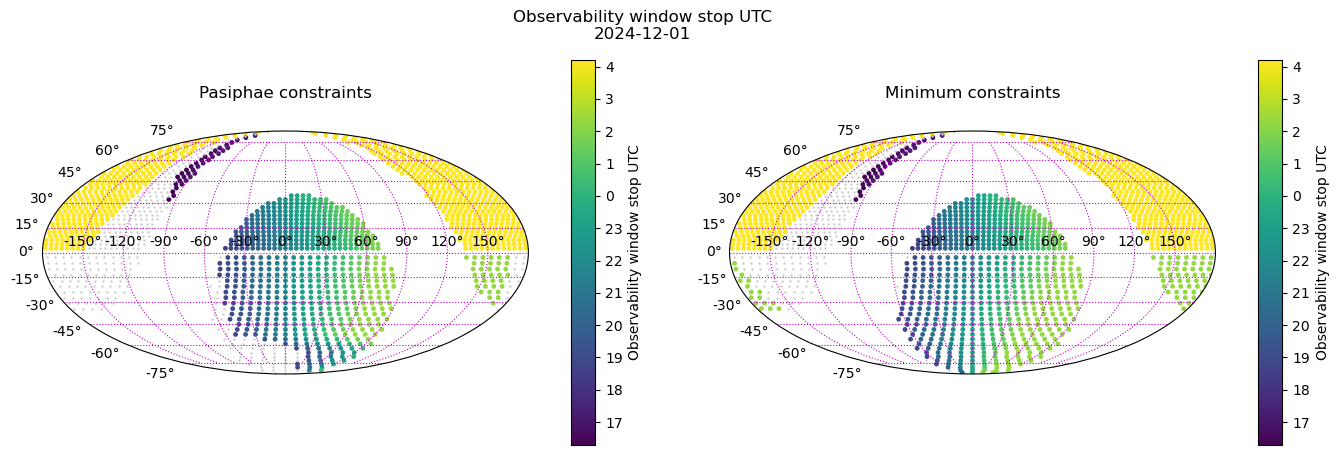

In [12]:
dates = Time([f'2024-{month:02d}-01' for month in range(1, 13)])
save_prefix = '03_ObsStop'
obs = 'stop'

dir_save = os.path.join(root_figs, '{0}_{1}'.format('galactic' if galactic else 'equatorial', projection))

if not os.path.exists(dir_save):
    os.makedirs(dir_save)
    
plot(dates, obs, galactic, projection, dir_save, save_prefix)

### Observability window duration

Plot date 2024-01-01..
Querying fields..
Querying fields..
Plot date 2024-02-01..
Querying fields..
Querying fields..
Plot date 2024-03-01..
Querying fields..
Querying fields..
Plot date 2024-04-01..
Querying fields..
Querying fields..
Plot date 2024-05-01..
Querying fields..
Querying fields..
Plot date 2024-06-01..
Querying fields..
Querying fields..
Plot date 2024-07-01..
Querying fields..
Querying fields..
Plot date 2024-08-01..
Querying fields..
Querying fields..
Plot date 2024-09-01..
Querying fields..
Querying fields..
Plot date 2024-10-01..
Querying fields..
Querying fields..
Plot date 2024-11-01..
Querying fields..
Querying fields..
Plot date 2024-12-01..
Querying fields..
Querying fields..


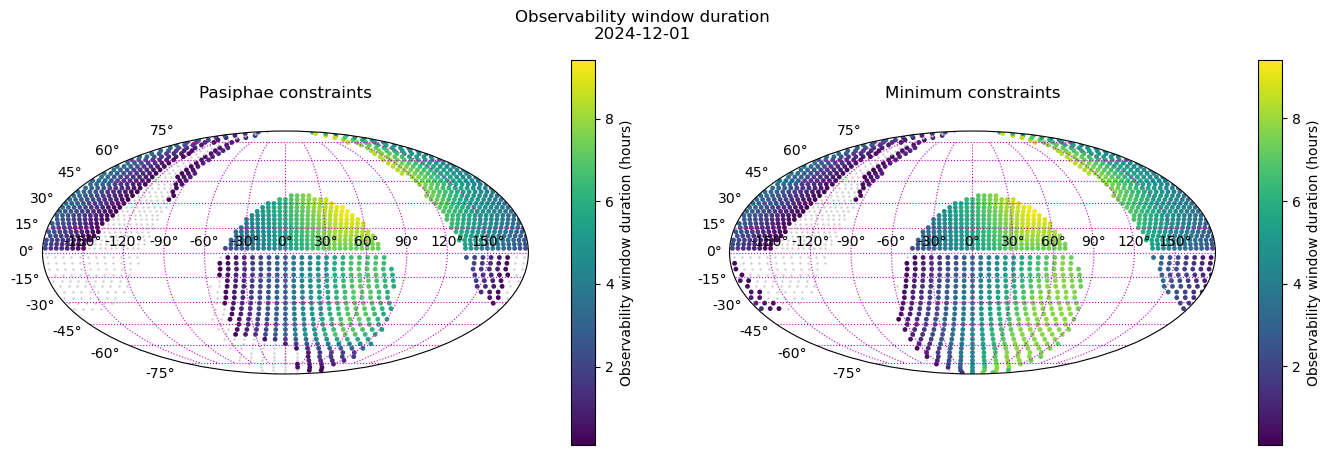

In [13]:
dates = Time([f'2024-{month:02d}-01' for month in range(1, 13)])
save_prefix = '04_ObsDuration'
obs = 'duration'

dir_save = os.path.join(root_figs, '{0}_{1}'.format('galactic' if galactic else 'equatorial', projection))

if not os.path.exists(dir_save):
    os.makedirs(dir_save)
    
plot(dates, obs, galactic, projection, dir_save, save_prefix)

### Observability window duration

Plot date 2024-01-01..
Querying fields..
Querying fields..
Plot date 2024-02-01..
Querying fields..
Querying fields..
Plot date 2024-03-01..
Querying fields..
Querying fields..
Plot date 2024-04-01..
Querying fields..
Querying fields..
Plot date 2024-05-01..
Querying fields..
Querying fields..
Plot date 2024-06-01..
Querying fields..
Querying fields..
Plot date 2024-07-01..
Querying fields..
Querying fields..
Plot date 2024-08-01..
Querying fields..
Querying fields..
Plot date 2024-09-01..
Querying fields..
Querying fields..
Plot date 2024-10-01..
Querying fields..
Querying fields..
Plot date 2024-11-01..
Querying fields..
Querying fields..
Plot date 2024-12-01..
Querying fields..
Querying fields..


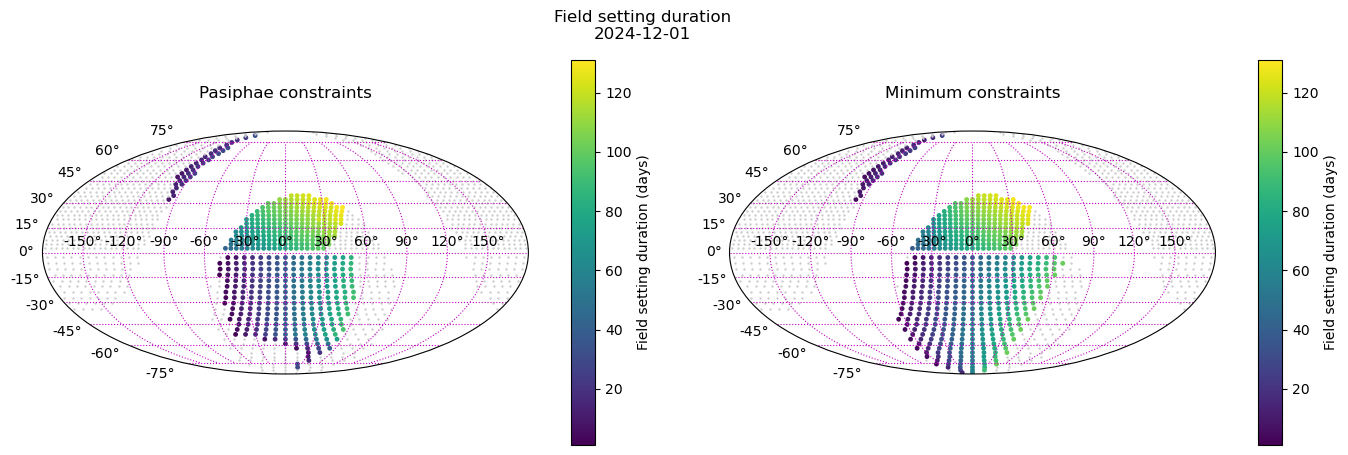

In [14]:
dates = Time([f'2024-{month:02d}-01' for month in range(1, 13)])
save_prefix = '05_SettingDuration'
obs = 'setting_duration'

dir_save = os.path.join(root_figs, '{0}_{1}'.format('galactic' if galactic else 'equatorial', projection))

if not os.path.exists(dir_save):
    os.makedirs(dir_save)
    
plot(dates, obs, galactic, projection, dir_save, save_prefix)

### Annual observability

Set up visualizers:

In [15]:
visualizer = {key: AnnualObservabilityVisualizer(surveyplanner=planner[key]) for key in db_names.keys()}

Querying fields..
Set prioritizer(s)..
Added prioritizer AnnualAvailability.
Add annual observability to fields..done
Querying fields..
Set prioritizer(s)..
Added prioritizer AnnualAvailability.
Add annual observability to fields..done


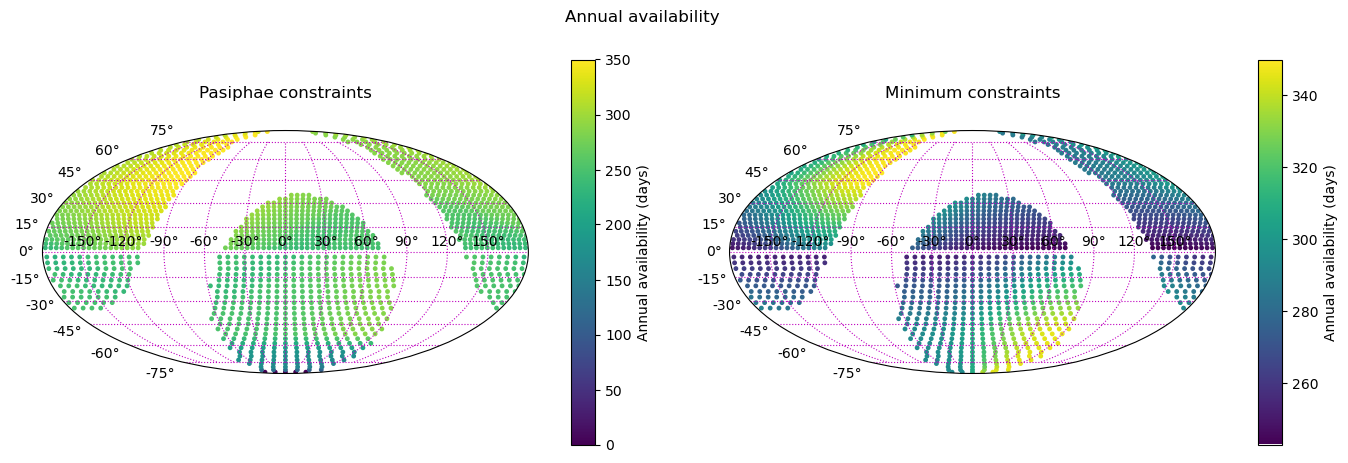

In [16]:
fig = plt.figure(figsize=(16, 5))
gs = GridSpec(1, 5, width_ratios=[20, 1, 2, 20, 1])
ax = [plt.subplot(gs[0], projection=projection),
      plt.subplot(gs[3], projection=projection)]
cax = [plt.subplot(gs[1]),
      plt.subplot(gs[4])]

# plot:
for i, key in enumerate(keys):
    visualizer[key].plot(galactic=galactic, ax=ax[i], cax=cax[i], plot_kws={'s': 6})
    ax[i].set_title(labels[key], y=1.1)

# add figure title and save:
plt.suptitle('Annual availability')

dir_save = os.path.join(root_figs, '{0}_{1}'.format('galactic' if galactic else 'equatorial', projection))

if not os.path.exists(dir_save):
    os.makedirs(dir_save)
    
plt.savefig(os.path.join(dir_save, f'06_AnnualObservability.png'))

#### Are there fields that can never be observed?

##### Minimum constraints

In [17]:
key = 'min_constr'
fields = visualizer[key].fields.loc[:, ('field_id', 'center_ra', 'center_dec', 'telescope', 'annual_availability')]
annual_availability = fields.annual_availability.apply(pd.Series)
fields = fields.loc[:, ('field_id', 'center_ra', 'center_dec', 'telescope')].join(annual_availability)
sel = fields['available_days'] == 0

if not np.sum(sel):
    print('All field are observable')
else:
    print('These fields are never observable:\n')
    sel = fields['available_days'] == 0
    display(fields.loc[sel])

All field are observable


##### Pasiphae constraints

In [18]:
key = 'pasiphae_constr'
fields = visualizer[key].fields.loc[:, ('field_id', 'center_ra', 'center_dec', 'telescope', 'annual_availability')]
annual_availability = fields.annual_availability.apply(pd.Series)
fields = fields.loc[:, ('field_id', 'center_ra', 'center_dec', 'telescope')].join(annual_availability)
sel = fields['available_days'] == 0

if not np.sum(sel):
    print('All field are observable')
else:
    print('These fields are never observable:\n')
    sel = fields['available_days'] == 0
    display(fields.loc[sel])

These fields are never observable:



,field_id,center_ra,center_dec,telescope,available_days,available_rate
1097,1098,0.000000,-1.518436,SAAO,0.0,0.0
1098,1099,0.897598,-1.518436,SAAO,0.0,0.0
1099,1100,1.795196,-1.518436,SAAO,0.0,0.0
1100,1101,-1.795196,-1.518436,SAAO,0.0,0.0
1101,1102,-0.897598,-1.518436,SAAO,0.0,0.0
